In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns

In [53]:
sys.path.insert(0, os.path.abspath('../palin/python'))

In [123]:
from palin.simulation.simple_experiment import SimpleExperiment
from palin.simulation.double_pass_experiment import DoublePassExperiment
from palin.simulation.trial import Int2Trial, Int1Trial 
from palin.simulation.linear_observer import LinearObserver
from palin.simulation.kernel_distance import KernelDistance
from palin.simulation.internal_noise_value import InternalNoiseValue
from palin.simulation.double_pass_statistics import DoublePassStatistics
from palin.kernels.classification_images import ClassificationImage
from palin.internal_noise.double_pass import DoublePass
from palin.simulation.simulation import Simulation as Sim

## Simulate with internal noise

Single run

In [122]:
# single run: 
exp = DoublePassExperiment(n_trials = 100, n_repeated=50,
          trial_type = Int2Trial, 
          n_features = 5, 
          external_noise_std = 100)
obs = Obs.with_random_kernel(n_features = exp.n_features, 
                            internal_noise_std = 0, 
                            criteria = 1)
responses = obs.respond_to_experiment(exp)
ana = InternalNoiseValue(internal_noise_extractor = DoublePass)
ana.analyse(exp, obs, responses)

E:\WORK\DO\2022\palin\python\palin\internal_noise\double_pass.py:43: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  pass_count_df.columns = ["_".join(x) for x in pass_count_df.columns.ravel()]


0.24

Simulation

In [ ]:
observer_params = {'kernel':[[1]],
                   'internal_noise_std':[0], 
                  'criteria':[0]}
experiment_params = {'n_trials':[1000],#np.arange(1,1000,100),
                     'n_repeated':[1000],
                     'trial_type': [Int2Trial],
                     'n_features': [1],
                     'external_noise_std': [100]}
analyser_params = {'internal_noise_extractor':[DoublePass], 
                  'model_file': ['model_11_04_2024.csv'], 
                  'rebuild_model': [False],
                   'internal_noise_range':[np.arange(0,5.1,0.1)],
                   'criteria_range':[np.arange(-5,5,0.1)]
                  }


sim = Sim(DoublePassExperiment, experiment_params, 
          LinearObserver, observer_params, 
          InternalNoiseValue, analyser_params)
sim_df = sim.run_all(n_runs=1)



Running 1 configs
{'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 100, 'kernel': [1], 'internal_noise_std': 0, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model_11_04_2024.csv', 'rebuild_model': False, 'internal_noise_range': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]), 'criteria_range': array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.4000

In [177]:
sim_df

,n_trials,n_repeated,trial_type,n_features,external_noise_std,kernel,internal_noise_std,criteria,internal_noise_extractor,model_file,run,metric
0,1000,1000,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],0,-1,<class 'palin.internal_noise.double_pass.Doubl...,model.csv,0,0.0
1,1000,1000,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],0,1,<class 'palin.internal_noise.double_pass.Doubl...,model.csv,0,0.0
2,1000,1000,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],1,-1,<class 'palin.internal_noise.double_pass.Doubl...,model.csv,0,1.0
3,1000,1000,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],1,1,<class 'palin.internal_noise.double_pass.Doubl...,model.csv,0,0.7


## Simulate with kernels

Single run

In [104]:
# single run: 
exp = Exp(n_trials = 100,
          trial_type = Int2Trial, 
          n_features = 5, 
          external_noise_std = 100)
obs = Obs.with_random_kernel(n_features = 5, 
                            internal_noise_std = 1, 
                            criteria = 0)
responses = obs.respond_to_experiment(exp)
ka = Analyser(ClassificationImage)
ka.analyse(exp, obs, responses)

0.948432263142621

In [15]:
# obs = Obs.with_random_kernel(n_features=5, internal_noise_std=0, criteria=0)

observer_params = {'kernel':['random'],
                   'internal_noise_std':[1], 
                  'criteria':[0]}
experiment_params = {'n_trials':[100],#np.arange(1,1000,100),
                     'trial_type': [Int2Trial],
                     'n_features': np.arange(2,10,1),
                     'external_noise_std': [100]}
analyser_params = {'kernel_extractor':[ClassificationImage], 
                  'distance':['CORR']}


sim = Sim(Exp, experiment_params, 
          Obs, observer_params, 
          Analyser, analyser_params)
sim_df = sim.run_all(n_samples=1)






generated 8 runs
{'n_trials': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 2, 'external_noise_std': 100, 'kernel': 'random', 'internal_noise_std': 1, 'criteria': 0, 'kernel_extractor': <class 'palin.kernels.classification_images.ClassificationImage'>, 'distance': 'CORR'}
.
{'n_trials': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 3, 'external_noise_std': 100, 'kernel': 'random', 'internal_noise_std': 1, 'criteria': 0, 'kernel_extractor': <class 'palin.kernels.classification_images.ClassificationImage'>, 'distance': 'CORR'}
.
{'n_trials': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 4, 'external_noise_std': 100, 'kernel': 'random', 'internal_noise_std': 1, 'criteria': 0, 'kernel_extractor': <class 'palin.kernels.classification_images.ClassificationImage'>, 'distance': 'CORR'}
.
{'n_trials': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1

In [147]:
sim_df

,n_trials,n_repeated,trial_type,n_features,external_noise_std,kernel,internal_noise_std,criteria,sample,metric,dist,prob_agree,prob_first
0,100,50,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],0.0,-5,0,"(1.0, 1.0)",0.2900,0.8,0.5
1,100,50,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],0.0,-4,0,"(1.0, 1.0)",0.2900,0.8,0.5
2,100,50,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],0.0,-3,0,"(1.0, 1.0)",0.2900,0.8,0.5
3,100,50,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],0.0,-2,0,"(1.0, 0.88)",0.1844,0.8,0.5
4,100,50,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],0.0,-1,0,"(1.0, 0.68)",0.0724,0.8,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100,50,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],4.9,0,0,"(0.56, 0.5)",0.0576,0.8,0.5
496,100,50,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],4.9,1,0,"(0.56, 0.34)",0.0832,0.8,0.5
497,100,50,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],4.9,2,0,"(0.54, 0.41)",0.0757,0.8,0.5
498,100,50,<class 'palin.simulation.trial.Int2Trial'>,1,100,[1],4.9,3,0,"(0.62, 0.23)",0.1053,0.8,0.5


<Axes: xlabel='n_features', ylabel='metric'>

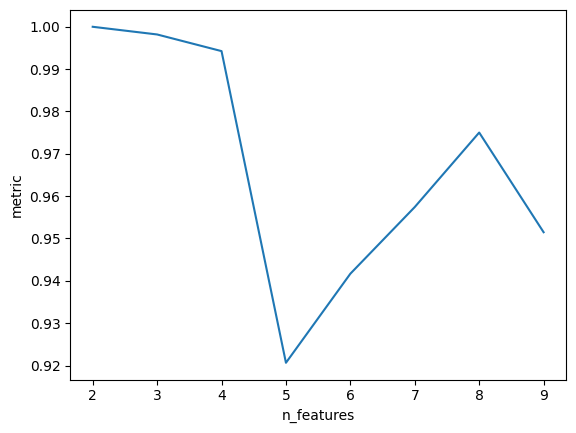

In [17]:
sns.lineplot(data=sim_df, 
             x='n_features',
             y='metric')#, hue='n_features')

In [168]:
list(data_df)

['subj',
 'trial',
 'block',
 'date',
 'stim',
 'stim_order',
 'response',
 'rt',
 'age',
 'sex',
 'param_index',
 'segment_time',
 'pitch']

In [174]:
data_df = pd.read_csv('../data/pitch_interrogation/results_subj_20111971.csv')


set_df = data_df.groupby('trial').agg({'pitch': lambda group: tuple(group)}).reset_index()

# count how many trials have each unique pair of stimuli
pass_count_df = set_df.groupby('pitch').agg({'trial': ['nunique','first','last']})
pass_count_df.columns = ["_".join(x) for x in pass_count_df.columns]





In [173]:
["_".join(x) for x in pass_count_df.columns]


['trial_nunique', 'trial_first', 'trial_last']

In [175]:
pass_count_df

,trial_nunique,trial_first,trial_last
pitch,,,
"(-140.284917, 56.043903, -2.142699, -41.999388, -69.522618, 29.697532, 40.565741, 23.45052, 102.584681, 38.2243, -16.427695, 7.421137, -9.369055, -89.176758)",1,18,18
"(-135.344658, -76.172858, -130.999312, -146.306144, -78.266251, 30.254136, -114.179281, 102.170357, 20.715456, 81.972821, -125.018297, 103.374214, -81.704677, 85.109238)",2,82,132
"(-133.8014, 34.189717, -145.714669, 1.717896, 99.036025, 56.473042, 113.578937, 126.187147, 44.969184, -108.017243, 6.480803, 89.811831, 60.034007, 63.317816)",2,69,119
"(-133.486308, -51.704384, 123.73441, -122.063627, 105.373754, 42.489978, 65.5363, -67.009894, -124.385437, -32.338754, -145.840775, -6.786611, 89.278278, -47.823672)",2,72,122
"(-132.910898, -40.348113, -144.469254, -148.365603, 29.209812, -68.789467, 116.539457, 102.52713, 114.03702, -45.723055, -109.210749, -29.266312, -77.798514, -133.179439)",2,96,146
...,...,...,...
"(139.821339, -90.088416, -144.376143, -83.117215, -15.266959, -78.645111, 18.56671, 123.541183, -79.641893, -129.036775, -12.372422, 47.099802, 133.796504, 125.051187)",1,31,31
"(141.243943, -34.322435, 10.018864, -24.066951, 45.502655, 107.276086, 58.11038, 46.973159, -61.71182, 14.836428, 30.862549, 28.459321, 2.114815, 86.651936)",1,11,11
"(143.598511, 23.645136, -118.740497, -109.046436, 66.022521, -13.059175, 22.70066, 69.316576, -9.39536, -16.21002, 5.282415, -92.031474, -71.382142, -144.168558)",2,80,130
